In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
## EDA

In [4]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

In [5]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
num_cols=df._get_numeric_data()
num_cols

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [8]:
cat_cols=df.drop(columns=num_cols)
cat_cols

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [9]:
## Scaling

In [10]:
std=StandardScaler()

In [11]:
num_col=pd.DataFrame(std.fit_transform(num_cols),columns=["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"])
num_col

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [12]:
minmax=MinMaxScaler()

In [13]:
num_col=pd.DataFrame(minmax.fit_transform(num_cols),columns=["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"])
num_col

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


•	Discuss the scenarios where each scaling technique is preferred and why.

Standard Scaler

Works best when the data follows a normal (Gaussian) distribution.

Preferred for distance-based models (e.g., Linear Regression, Logistic Regression, SVM, K-Means, PCA).
    
Ensures that features have zero mean and unit variance, making optimization more stable.
    
Min-Max Scaling
    
Works best when data is not normally distributed and has a fixed range.
    
Suitable for models like Neural Networks (Deep Learning), KNN, Decision Trees, where features should be in a specific range (e.g., [0,1]).
    
Preserves the relationships between values, which can be useful in certain applications (e.g., image processing).

 Robust Scaling

Best when data contains many outliers, as it uses the median instead of the mean.

 Preferred for robust machine learning models that need to handle skewed data (e.g., financial data, salaries, or stock prices).

In [15]:
## Labelling

In [16]:
one=[]
label=[]
for i in cat_cols.columns:
    if len(cat_cols[i].unique())<5:
        one.append(i)
    else:
        label.append(i)
one

['sex', 'income']

In [17]:
label

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [18]:
onehot=OneHotEncoder()

In [19]:
one_hot=one=onehot.fit_transform(df[["sex"]]).toarray()
one_hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [20]:
df_data=pd.DataFrame(one_hot)
df_data

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
32556,1.0,0.0
32557,0.0,1.0
32558,1.0,0.0
32559,0.0,1.0


In [21]:
df_final=df.join(df_data)
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,0,1
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.0,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.0,1.0


In [22]:
df_final.drop(columns="sex",inplace=True)
df_final.rename(columns={0:"Female",1:"Male"},inplace=True)
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0.0,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0.0,1.0


In [23]:
one_hot=one=onehot.fit_transform(df[["income"]]).toarray()
one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [24]:
df_data=pd.DataFrame(one_hot)
df_data

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
32556,1.0,0.0
32557,0.0,1.0
32558,1.0,0.0
32559,1.0,0.0


In [25]:
df_final=df_final.join(df_data)
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,Female,Male,0,1
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0.0,1.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0.0,1.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0.0,1.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0.0,1.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1.0,0.0,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0.0,1.0,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1.0,0.0,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0.0,1.0,1.0,0.0


In [26]:
df_final.drop(columns="income",inplace=True)
df_final.rename(columns={0:"<=50",1:">50"},inplace=True)
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50,>50
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0.0,1.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0.0,1.0,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0.0,1.0,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0.0,1.0,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,1.0,0.0,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,0.0,1.0,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,1.0,0.0,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,0.0,1.0,1.0,0.0


In [27]:
label

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [28]:
le=LabelEncoder()

In [108]:
## Labelencoding

In [29]:
df_final["workclass_enco"]=le.fit_transform(df_final[["workclass"]])
df_final["education_enco"]=le.fit_transform(df_final[["education"]])
df_final["marital_status_enco"]=le.fit_transform(df_final[["marital_status"]])
df_final["occupation_enco"]=le.fit_transform(df_final[["occupation"]])
df_final["relationship_enco"]=le.fit_transform(df_final[["relationship"]])
df_final["race_enco"]=le.fit_transform(df_final[["race"]])
df_final["native_country_enco"]=le.fit_transform(df_final[["native_country"]])
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,native_country_enco
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,...,1.0,1.0,0.0,7,9,4,1,1,4,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,1.0,1.0,0.0,6,9,2,4,0,4,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,1.0,1.0,0.0,4,11,0,6,1,4,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,1.0,1.0,0.0,4,1,2,6,0,2,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,0.0,1.0,0.0,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,...,0.0,1.0,0.0,4,7,2,13,5,4,39
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,1.0,0.0,1.0,4,11,2,7,0,4,39
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,...,0.0,1.0,0.0,4,11,6,1,4,4,39
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,1.0,1.0,0.0,4,11,4,1,3,4,39


In [30]:
df_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,native_country_enco
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,...,1.0,1.0,0.0,7,9,4,1,1,4,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,1.0,1.0,0.0,6,9,2,4,0,4,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,1.0,1.0,0.0,4,11,0,6,1,4,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,1.0,1.0,0.0,4,1,2,6,0,2,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,0.0,1.0,0.0,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,...,0.0,1.0,0.0,4,7,2,13,5,4,39
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,1.0,0.0,1.0,4,11,2,7,0,4,39
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,...,0.0,1.0,0.0,4,11,6,1,4,4,39
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,1.0,1.0,0.0,4,11,4,1,3,4,39


In [110]:
## Droping the columns after encoding

In [31]:
df_final.drop(columns=["workclass","education","marital_status","occupation","relationship","race","native_country"],inplace=True)
df_final

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,native_country_enco
0,39,77516,13,2174,0,40,0.0,1.0,1.0,0.0,7,9,4,1,1,4,39
1,50,83311,13,0,0,13,0.0,1.0,1.0,0.0,6,9,2,4,0,4,39
2,38,215646,9,0,0,40,0.0,1.0,1.0,0.0,4,11,0,6,1,4,39
3,53,234721,7,0,0,40,0.0,1.0,1.0,0.0,4,1,2,6,0,2,39
4,28,338409,13,0,0,40,1.0,0.0,1.0,0.0,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1.0,0.0,1.0,0.0,4,7,2,13,5,4,39
32557,40,154374,9,0,0,40,0.0,1.0,0.0,1.0,4,11,2,7,0,4,39
32558,58,151910,9,0,0,40,1.0,0.0,1.0,0.0,4,11,6,1,4,4,39
32559,22,201490,9,0,0,20,0.0,1.0,1.0,0.0,4,11,4,1,3,4,39


In [32]:
df_final.drop(columns=["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"],inplace=True)
df_final

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,native_country_enco
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,39
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,39
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,39
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,39
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,39
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,39
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,39
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,39


In [33]:
## Final Data after performing scaling and labelling

In [34]:
df_final=df_final.join(num_col)
df_final

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,native_country_enco,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,39,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,39,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,39,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,39,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,5,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,39,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,39,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,39,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,39,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


Pros of One-Hot Encoding

No ordinal relationship introduced → Prevents models from assuming ranking in categories.

Works well with Tree-Based Models (e.g., Decision Trees, Random Forest, XGBoost).

Effective for small category sizes (≤ 10 categories).

Cons of One-Hot Encoding

Increases dimensionality → More categories = More columns = Higher memory usage.

Not efficient for high-cardinality features (e.g., city names, product IDs).

Sparse Data Problem → Many zeros in the dataset slow down computation.

Pros of Label Encoding

Memory-efficient -> Uses only one column instead of many.

Works well with models that support categorical features natively (e.g., LightGBM, CatBoost).

Best for ordinal categorical data (e.g., Low < Medium < High).

Cons of Label Encoding

Creates an artificial ordinal relationship → Models may interpret Red (0) < Blue (1) < Green (2), which is incorrect.

 Not suitable for non-ordinal categorical data (e.g., country names, colors, brands).

In [36]:
## •	Create at least 2 new features that could be beneficial for the model

In [37]:
df_final['age_group'] = pd.cut(df_final['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df_final= pd.get_dummies(df_final, columns=['age_group'])
df_final

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,...,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_group_Young,age_group_Adult,age_group_Middle-Aged,age_group_Senior
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,...,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,1,0,0,0
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,...,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,1,0,0,0
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,...,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,1,0,0,0
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,...,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,1,0,0,0
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,...,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,...,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,1,0,0,0
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,...,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1,0,0,0
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,...,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,1,0,0,0
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,...,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,1,0,0,0


In [38]:
df_final['edu_work_ratio'] = df_final['hours_per_week'] / (df_final['education_num'] + 1) 
df_final

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,...,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_group_Young,age_group_Adult,age_group_Middle-Aged,age_group_Senior,edu_work_ratio
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,...,0.044302,0.800000,0.021740,0.0,0.397959,1,0,0,0,0.221088
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,...,0.048238,0.800000,0.000000,0.0,0.122449,1,0,0,0,0.068027
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,...,0.138113,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,...,0.151068,0.400000,0.000000,0.0,0.397959,1,0,0,0,0.284257
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,...,0.221488,0.800000,0.000000,0.0,0.397959,1,0,0,0,0.221088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,...,0.166404,0.733333,0.000000,0.0,0.377551,1,0,0,0,0.217818
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,...,0.096500,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,...,0.094827,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,...,0.128499,0.533333,0.000000,0.0,0.193878,1,0,0,0,0.126442


In [39]:
df_final['capital-gain-log'] = np.log1p(df_final['capital_gain'])
df_final

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,...,education_num,capital_gain,capital_loss,hours_per_week,age_group_Young,age_group_Adult,age_group_Middle-Aged,age_group_Senior,edu_work_ratio,capital-gain-log
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,...,0.800000,0.021740,0.0,0.397959,1,0,0,0,0.221088,0.021507
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,...,0.800000,0.000000,0.0,0.122449,1,0,0,0,0.068027,0.000000
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,...,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,...,0.400000,0.000000,0.0,0.397959,1,0,0,0,0.284257,0.000000
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,...,0.800000,0.000000,0.0,0.397959,1,0,0,0,0.221088,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,...,0.733333,0.000000,0.0,0.377551,1,0,0,0,0.217818,0.000000
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,...,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,...,0.533333,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,...,0.533333,0.000000,0.0,0.193878,1,0,0,0,0.126442,0.000000


Explain the rationale behind your choices.

Age Group" helps capture non-linear relationships between age and income.

"Edu-Work Ratio" provides insights into the impact of education on work hours and possible income levels.

In [41]:
## Treating the outlier

In [42]:
from sklearn.ensemble import IsolationForest

In [43]:
model=IsolationForest(contamination=0.01)

In [44]:
model.fit(df_final)

IsolationForest(contamination=0.01)

In [45]:
model.predict(df_final)

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
df_final["Analomy"]=model.predict(df_final)

In [47]:
df_new=df_final[df_final["Analomy"]!=-1]
df_new

,Female,Male,<=50,>50,workclass_enco,education_enco,marital_status_enco,occupation_enco,relationship_enco,race_enco,...,capital_gain,capital_loss,hours_per_week,age_group_Young,age_group_Adult,age_group_Middle-Aged,age_group_Senior,edu_work_ratio,capital-gain-log,Analomy
0,0.0,1.0,1.0,0.0,7,9,4,1,1,4,...,0.021740,0.0,0.397959,1,0,0,0,0.221088,0.021507,1
1,0.0,1.0,1.0,0.0,6,9,2,4,0,4,...,0.000000,0.0,0.122449,1,0,0,0,0.068027,0.000000,1
2,0.0,1.0,1.0,0.0,4,11,0,6,1,4,...,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000,1
3,0.0,1.0,1.0,0.0,4,1,2,6,0,2,...,0.000000,0.0,0.397959,1,0,0,0,0.284257,0.000000,1
4,1.0,0.0,1.0,0.0,4,9,2,10,5,2,...,0.000000,0.0,0.397959,1,0,0,0,0.221088,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1.0,0.0,1.0,0.0,4,7,2,13,5,4,...,0.000000,0.0,0.377551,1,0,0,0,0.217818,0.000000,1
32557,0.0,1.0,0.0,1.0,4,11,2,7,0,4,...,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000,1
32558,1.0,0.0,1.0,0.0,4,11,6,1,4,4,...,0.000000,0.0,0.397959,1,0,0,0,0.259539,0.000000,1
32559,0.0,1.0,1.0,0.0,4,11,4,1,3,4,...,0.000000,0.0,0.193878,1,0,0,0,0.126442,0.000000,1


Discuss how outliers can affect model performance.
    
Linear Models (Regression, SVM): Skew predictions, increasing variance.
    
Distance-Based Models (KNN, Clustering): Distort distance calculations.

Tree-Based Models (Random Forest, XGBoost): Less affected.
    
Neural Networks: Cause unstable training and slow convergence.
    
Problems Caused by Outliers:

Skewed Predictions → Distorts regression lines.
    
Poor Generalization → Increases variance, leading to overfitting.
    
Misclassification → Shifts decision boundaries in classification models.

In [49]:
pip install pandas==1.5.3


Note: you may need to restart the kernel to use updated packages.


In [50]:
## calculating the ppscore

In [51]:
import ppscore as pps

In [52]:
pps.matrix(df_new.drop(columns="Analomy"))

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Female,Female,1.0,predict_itself,True,None,0.000000,1.000000,None
1,Female,Male,1.0,regression,True,mean absolute error,0.317800,0.000000,DecisionTreeRegressor()
2,Female,<=50,0.0,regression,True,mean absolute error,0.240200,0.348523,DecisionTreeRegressor()
3,Female,>50,0.0,regression,True,mean absolute error,0.240200,0.348523,DecisionTreeRegressor()
4,Female,workclass_enco,0.0,regression,True,mean absolute error,0.752600,0.825722,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
524,capital-gain-log,age_group_Adult,0.0,target_is_constant,True,None,1.000000,1.000000,None
525,capital-gain-log,age_group_Middle-Aged,0.0,target_is_constant,True,None,1.000000,1.000000,None
526,capital-gain-log,age_group_Senior,0.0,target_is_constant,True,None,1.000000,1.000000,None
527,capital-gain-log,edu_work_ratio,0.0,regression,True,mean absolute error,0.054065,0.055279,DecisionTreeRegressor()


In [53]:
corr=df_new.drop(columns="Analomy").corr()

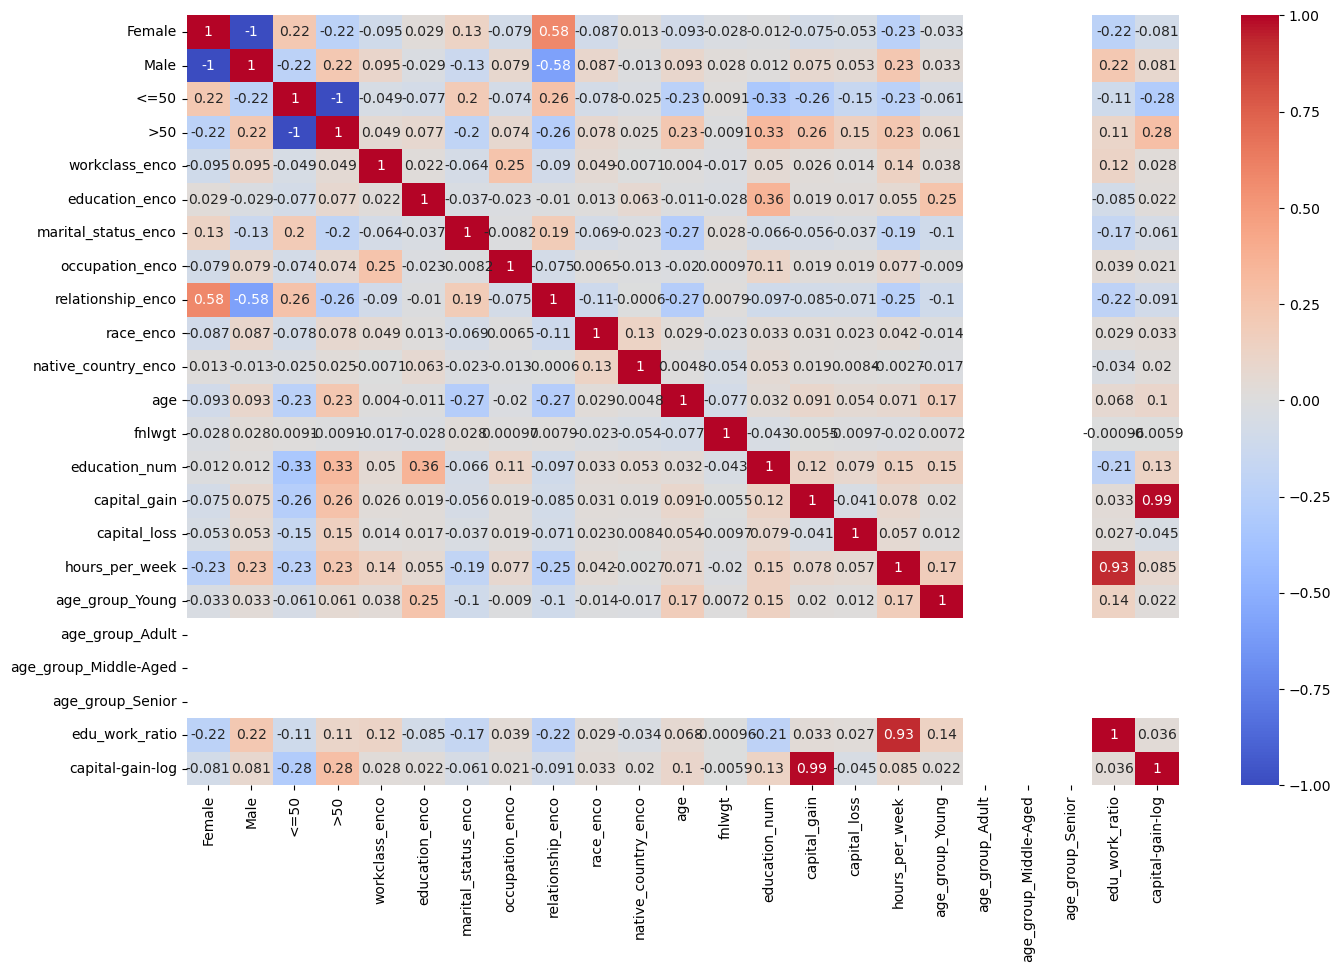

In [54]:
plt.figure(figsize=(16, 10))  # Set the figure size (width=12, height=8)
sns.heatmap(corr, annot=True, cmap=plt.cm.coolwarm)

plt.show()

Compare its findings with the correlation matrix.

If PPS > Correlation, the relationship is non-linear and may be important for decision trees or neural networks.
    
If Correlation > PPS, it’s a linear relationship, useful for regression models.
    
If both are low, the feature may not be useful.